In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

In [21]:
# Reference the file where the CSV is located
data = "cleanedData.csv"

# Import the data into a Pandas DataFrame
cleanerDF = pd.read_csv(data)
cleanerDF.head()

,Unnamed: 0,yearID,Rank,G,Ghome,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,SV,E
0,1541,1970,5,162,81.0,76,86,736,5546,1495,...,24,160,522.0,736.0,58.0,688,4.33,45,24,141
1,1542,1970,1,162,81.0,108,54,792,5545,1424,...,25,179,717.0,952.0,84.0,517,3.15,60,31,117
2,1543,1970,3,162,81.0,87,75,786,5535,1450,...,28,203,594.0,855.0,50.0,622,3.87,38,44,156
3,1544,1970,3,162,81.0,86,76,631,5532,1391,...,40,114,447.0,922.0,69.0,566,3.48,21,49,127
4,1545,1970,6,162,84.0,56,106,633,5514,1394,...,20,123,477.0,872.0,53.0,722,4.54,20,30,165


In [22]:
# This lets me know that 2006 is about the last year in the 75% range for the training dataset
n = 76
cleanerDF.head(int(len(cleanerDF)*(n/100)))

,Unnamed: 0,yearID,Rank,G,Ghome,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,SV,E
0,1541,1970,5,162,81.0,76,86,736,5546,1495,...,24,160,522.0,736.0,58.0,688,4.33,45,24,141
1,1542,1970,1,162,81.0,108,54,792,5545,1424,...,25,179,717.0,952.0,84.0,517,3.15,60,31,117
2,1543,1970,3,162,81.0,87,75,786,5535,1450,...,28,203,594.0,855.0,50.0,622,3.87,38,44,156
3,1544,1970,3,162,81.0,86,76,631,5532,1391,...,40,114,447.0,922.0,69.0,566,3.48,21,49,127
4,1545,1970,6,162,84.0,56,106,633,5514,1394,...,20,123,477.0,872.0,53.0,722,4.54,20,30,165
5,1546,1970,2,162,80.0,84,78,806,5491,1424,...,44,179,607.0,844.0,39.0,599,3.76,59,25,137
6,1547,1970,1,162,81.0,102,60,775,5540,1498,...,45,191,547.0,984.0,115.0,592,3.69,32,60,151
7,1548,1970,5,162,81.0,76,86,649,5463,1358,...,23,183,503.0,909.0,25.0,630,3.91,34,35,133
8,1549,1970,4,162,81.0,79,83,666,5377,1282,...,38,148,656.0,825.0,29.0,658,4.09,33,39,133
9,1550,1970,4,162,81.0,79,83,744,5574,1446,...,47,129,598.0,911.0,114.0,685,4.23,36,35,140


In [23]:
trainingDF = cleanerDF.drop(cleanerDF[cleanerDF.yearID > 2006].index)
testingDF  = cleanerDF.drop(cleanerDF[cleanerDF.yearID < 2007].index)
testingDF.head()

,Unnamed: 0,yearID,Rank,G,Ghome,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,SV,E
994,2535,2007,1,162,81.0,90,72,712,5398,1350,...,40,171,532.0,1111.0,109.0,662,4.13,7,51,106
995,2536,2007,3,162,81.0,84,78,810,5689,1562,...,27,176,534.0,1149.0,64.0,665,4.11,1,36,107
996,2537,2007,4,162,81.0,69,93,756,5631,1529,...,30,142,500.0,939.0,144.0,827,5.17,4,30,79
997,2538,2007,1,162,81.0,96,66,867,5589,1561,...,35,166,689.0,1042.0,96.0,618,3.87,5,45,81
998,2539,2007,4,162,81.0,72,90,693,5441,1341,...,20,190,532.0,1149.0,78.0,763,4.77,9,42,108


In [24]:
X_train=trainingDF['R'].values.reshape(-1, 1)#, 'HR']

y_train=trainingDF['W'].values.reshape(-1, 1)

X_test=testingDF["R"].values.reshape(-1, 1)#, 'HR']

y_test=testingDF["W"].values.reshape(-1, 1)

lm=LinearRegression()


lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lm.coef_

array([[0.07574526]])

In [26]:
lm.intercept_

array([25.49953363])

In [27]:
predictions = lm.predict(X_test)
print(f"True output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y_test[0]}")

True output: [90]
Predicted output: [79.43015997]
Prediction Error: [-10.56984003]


In [28]:
X_train.shape

(994, 1)

In [29]:
y_train.shape

(994, 1)

In [30]:
x_min = X_train.min()
x_max = X_train.max()

In [31]:
y_min = y_train.min()
y_max = y_train.max()

In [32]:
y_min_actual = y_train.min()
y_max_actual = y_train.max()

In [33]:
y_min_predicted = lm.predict(x_min)
y_max_predicted = lm.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 37
Predicted Min Value: [[50.41972473]]
Actual Max Value: 116
Predicted Max Value: [[101.9265027]]


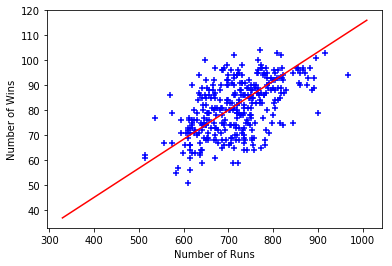

In [34]:
plt.scatter(X_test, y_test, c='blue', marker='+')
##plt.scatter(userInput, y, c='red')
plt.xlabel("Number of Runs")
plt.ylabel("Number of Wins")
plt.plot([x_min, x_max], [y_min, y_max], c='red')
#plt.scatter(userInput, y, c='red', marker='+')
#userInput

In [35]:
with open('runs_model_pickle','wb') as file:
    pickle.dump(lm,file)

In [36]:
userInput = lm.predict([[900]]) 
userInput

array([[93.67026918]])

In [37]:
lm.score(X_test, y_test)

0.27121177340363833